<a href="https://colab.research.google.com/github/dtype2100/Coding_test/blob/master/easy_ocr_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.2 MB/s 
     |████████████████████████████████| 47.6 MB 2.1 MB/s 
     |████████████████████████████████| 120 kB 45.5 MB/s 
     |████████████████████████████████| 604 kB 56.2 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [ ]:
# load example images
!npx degit JaidedAI/EasyOCR/examples -f

npx: installed 1 in 3.361s
> destination directory is not empty. Using --force, continuing
> cloned JaidedAI/EasyOCR#HEAD


In [ ]:
# list them
!ls -l

total 3512
-rw-r--r-- 1 root root   59898 Oct 13 03:13 chinese.jpg
drwx------ 5 root root    4096 Oct 24 07:56 drive
-rw-r--r-- 1 root root   97910 Oct 13 03:13 easyocr_framework.jpeg
-rw-r--r-- 1 root root 1740957 Oct 13 03:13 english.png
-rw-r--r-- 1 root root  487995 Oct 13 03:13 example2.png
-rw-r--r-- 1 root root  127454 Oct 13 03:13 example3.png
-rw-r--r-- 1 root root  488641 Oct 13 03:13 example.png
-rw-r--r-- 1 root root  168376 Oct 13 03:13 french.jpg
-rw-r--r-- 1 root root   42159 Oct 13 03:13 japanese.jpg
-rw-r--r-- 1 root root  225531 Oct 13 03:13 korean.png
drwxr-xr-x 1 root root    4096 Oct 20 13:33 sample_data
-rw-r--r-- 1 root root   82229 Oct 13 03:13 thai.jpg
-rw-r--r-- 1 root root   34706 Oct 13 03:13 width_ths.png


In [ ]:
path ='/content/drive/MyDrive/Colab Notebooks/sesac/project_test/image/wine.jpg'

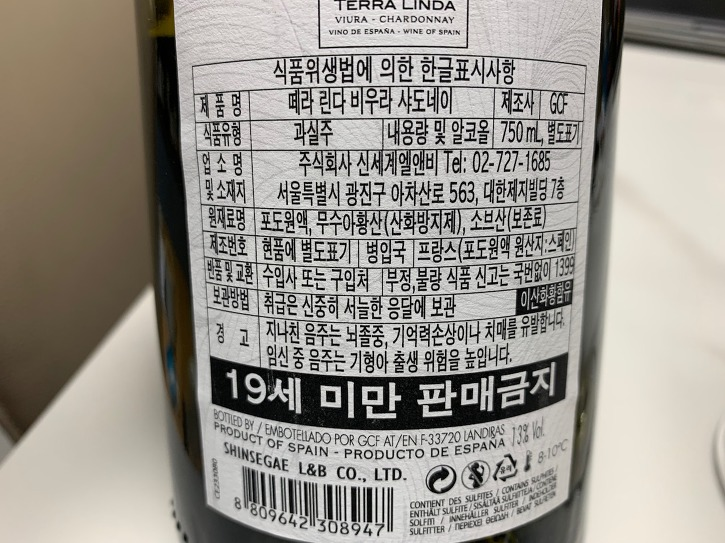

In [ ]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open(path)
im

In [ ]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['ko','en'])

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [ ]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext(im)
bounds

[([[333, 0], [457, 0], [457, 15], [333, 15]],
  'TERRA LINDA',
  0.6102336102182425),
 ([[334, 16], [368, 16], [368, 24], [334, 24]], 'VIURA', 0.6428607801510887),
 ([[379, 13], [457, 13], [457, 27], [379, 27]],
  'CHARDONNAY',
  0.9370188923559668),
 ([[364, 28], [394, 28], [394, 34], [364, 34]], '5GPN신4', 0.07949136642849411),
 ([[438, 28], [460, 28], [460, 34], [438, 34]], 'SA', 0.2286709460758651),
 ([[267, 51], [521, 51], [521, 91], [267, 91]],
  '직품위생벌에 의한 한글표시사향',
  0.27078013101058823),
 ([[195, 89], [245, 89], [245, 125], [195, 125]], '뚜평', 0.06741578091748085),
 ([[283, 83], [459, 83], [459, 119], [283, 119]],
  '펴라린다비우리 사도데이',
  0.1218700666280469),
 ([[497, 85], [575, 85], [575, 121], [497, 121]],
  '-좌| (',
  0.020531600997329834),
 ([[199, 117], [247, 117], [247, 153], [199, 153]],
  '표표형',
  0.0053229387617693465),
 ([[290, 118], [338, 118], [338, 150], [290, 150]], '과실주', 0.9811428128191751),
 ([[381, 113], [581, 113], [581, 151], [381, 151]],
  '[대용a 맞알코올] T30m나리E]',
 

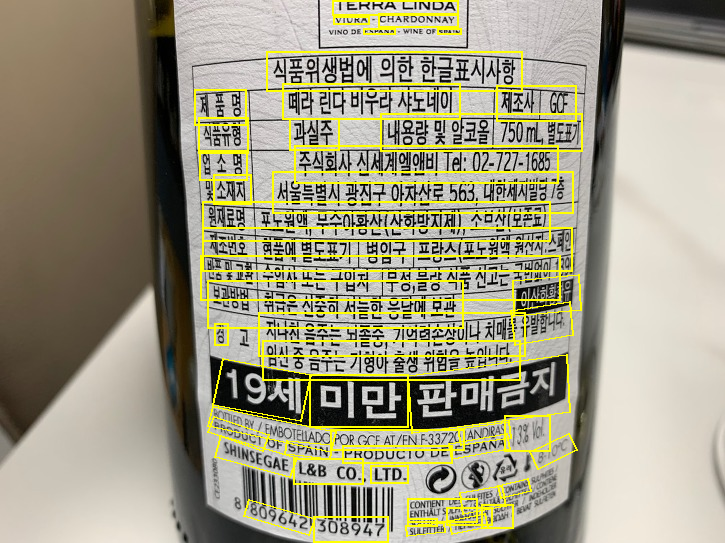

In [ ]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)